## API - chess.com

py -m pip install pandas
py -m pip install chess.com

In [142]:
import pandas as pd
import chess
import chess.pgn

from chessdotcom import get_leaderboards, get_player_stats, get_player_game_archives
import pprint
import requests

In [116]:
printer = pprint.PrettyPrinter()

def print_leaderboards():
    data = get_leaderboards().json['leaderboards']['live_blitz']
    printer.pprint(data)



In [117]:
print_leaderboards()

[{'@id': 'https://api.chess.com/pub/player/nihalsarin',
  'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/7195919.0a954af9.200x200o.f25b6cb158fa.jpeg',
  'country': 'https://api.chess.com/pub/country/FM',
  'draw_count': 1879,
  'flair_code': 'diamond_traditional',
  'loss_count': 6144,
  'name': 'Nihal Sarin',
  'player_id': 7195919,
  'rank': 1,
  'score': 3211,
  'status': 'premium',
  'title': 'GM',
  'trend_rank': {'delta': 0, 'direction': 0},
  'trend_score': {'delta': 0, 'direction': 0},
  'url': 'https://www.chess.com/member/nihalsarin',
  'username': 'nihalsarin',
  'win_count': 10032},
 {'@id': 'https://api.chess.com/pub/player/hikaru',
  'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/15448422.90503d66.200x200o.f323efa57fd0.jpeg',
  'country': 'https://api.chess.com/pub/country/US',
  'draw_count': 2895,
  'flair_code': 'diamond_traditional',
  'loss_count': 3917,
  'name': 'Hikaru Nakamura',
  'player_id': 15448422,
  'rank': 2,
  'score': 3160,
  's

## Getting Stats

In [118]:
data = get_player_stats('ADeny89').json['stats']
printer.pprint(data)

{'chess_blitz': {'best': {'date': 1638723467,
                          'game': 'https://www.chess.com/game/live/15625961209',
                          'rating': 1183},
                 'last': {'date': 1657899251, 'rating': 1059, 'rd': 45},
                 'record': {'draw': 20, 'loss': 304, 'win': 318}},
 'chess_bullet': {'best': {'date': 1636191619,
                           'game': 'https://www.chess.com/game/live/29930330299',
                           'rating': 1227},
                  'last': {'date': 1657460179, 'rating': 932, 'rd': 161},
                  'record': {'draw': 0, 'loss': 3, 'win': 2}},
 'chess_rapid': {'best': {'date': 1616174568,
                          'game': 'https://www.chess.com/game/live/9984163825',
                          'rating': 1446},
                 'last': {'date': 1629813245, 'rating': 1351, 'rd': 69},
                 'record': {'draw': 12, 'loss': 105, 'win': 124}},
 'fide': 0,
 'lessons': {},
 'puzzle_rush': {'best': {'score': 7, 'tota

In [119]:
def get_player_rating(username):
    data = get_player_stats(username).json['stats']
    categories = ['chess_blitz', 'chess_rapid', 'chess_bullet']
    for category in categories:
        print('Category:', category)
        print(f'Current: {data[category]["last"]["rating"]}')
        print(f'Best: {data[category]["best"]["rating"]}')
        print(f'Best: {data[category]["record"]}')

In [120]:
get_player_rating('ADeny89')

Category: chess_blitz
Current: 1059
Best: 1183
Best: {'win': 318, 'loss': 304, 'draw': 20}
Category: chess_rapid
Current: 1351
Best: 1446
Best: {'win': 124, 'loss': 105, 'draw': 12}
Category: chess_bullet
Current: 932
Best: 1227
Best: {'win': 2, 'loss': 3, 'draw': 0}


## Games Information

In [131]:
def show_most_recent_game(username):
    data = get_player_game_archives(username).json
    url = data['archives'][-1]
    games = requests.get(url).json()
    game = games['games'][-1]
    printer.pprint(game)

In [132]:
show_most_recent_game('ADeny89')

{'accuracies': {'black': 58.39, 'white': 65.42},
 'black': {'@id': 'https://api.chess.com/pub/player/johnnoyes',
           'rating': 1052,
           'result': 'resigned',
           'username': 'JohnNoyes',
           'uuid': 'ed524c18-c6d9-11e6-8036-000000000000'},
 'end_time': 1657899251,
 'fen': '2r3k1/pp1R1p1p/5Bp1/5n2/8/8/P1P2P1P/R6K b - -',
 'initial_setup': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1',
 'pgn': '[Event "Live Chess"]\n'
        '[Site "Chess.com"]\n'
        '[Date "2022.07.15"]\n'
        '[Round "-"]\n'
        '[White "ADeny89"]\n'
        '[Black "JohnNoyes"]\n'
        '[Result "1-0"]\n'
        '[CurrentPosition "2r3k1/pp1R1p1p/5Bp1/5n2/8/8/P1P2P1P/R6K b - -"]\n'
        '[Timezone "UTC"]\n'
        '[ECO "B00"]\n'
        '[ECOUrl '
        '"https://www.chess.com/openings/Nimzowitsch-Defense-Mikenas-Variation"]\n'
        '[UTCDate "2022.07.15"]\n'
        '[UTCTime "15:27:03"]\n'
        '[WhiteElo "1059"]\n'
        '[BlackElo "1052"]\n'


In [137]:
def get_most_recent_game(username):
    data = get_player_game_archives(username).json
    url = data['archives'][-1]
    games = requests.get(url).json()
    game = games['games'][-1]['pgn']
    return(game)

last_game = get_most_recent_game("ADeny89")
printer.pprint(last_game)

('[Event "Live Chess"]\n'
 '[Site "Chess.com"]\n'
 '[Date "2022.07.15"]\n'
 '[Round "-"]\n'
 '[White "ADeny89"]\n'
 '[Black "JohnNoyes"]\n'
 '[Result "1-0"]\n'
 '[CurrentPosition "2r3k1/pp1R1p1p/5Bp1/5n2/8/8/P1P2P1P/R6K b - -"]\n'
 '[Timezone "UTC"]\n'
 '[ECO "B00"]\n'
 '[ECOUrl '
 '"https://www.chess.com/openings/Nimzowitsch-Defense-Mikenas-Variation"]\n'
 '[UTCDate "2022.07.15"]\n'
 '[UTCTime "15:27:03"]\n'
 '[WhiteElo "1059"]\n'
 '[BlackElo "1052"]\n'
 '[TimeControl "300+5"]\n'
 '[Termination "ADeny89 won by resignation"]\n'
 '[StartTime "15:27:03"]\n'
 '[EndDate "2022.07.15"]\n'
 '[EndTime "15:34:11"]\n'
 '[Link "https://www.chess.com/game/live/51637817329"]\n'
 '\n'
 '1. e4 {[%clk 0:05:01.8]} 1... d6 {[%clk 0:05:03.5]} 2. d4 {[%clk 0:05:05.1]} '
 '2... Nc6 {[%clk 0:05:07.9]} 3. Nf3 {[%clk 0:05:07.9]} 3... Nf6 {[%clk '
 '0:05:08.4]} 4. Nc3 {[%clk 0:05:10.3]} 4... g6 {[%clk 0:05:12.4]} 5. Bb5 '
 '{[%clk 0:05:12.5]} 5... Bd7 {[%clk 0:05:14.6]} 6. e5 {[%clk 0:05:02.8]} 6... '
 'dxe5 {

## Chess Package

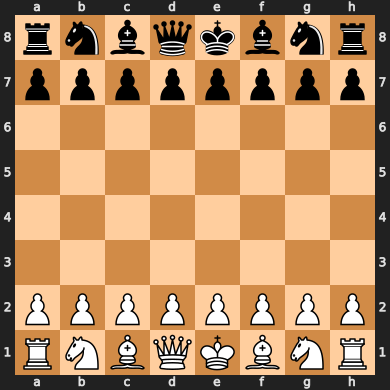

In [139]:
board = chess.Board()
board

In [151]:
type(last_game)
print(last_game)
pgn = open(last_game,  encoding="utf-8")
print(pgn)

[Event "Live Chess"]
[Site "Chess.com"]
[Date "2022.07.15"]
[Round "-"]
[White "ADeny89"]
[Black "JohnNoyes"]
[Result "1-0"]
[CurrentPosition "2r3k1/pp1R1p1p/5Bp1/5n2/8/8/P1P2P1P/R6K b - -"]
[Timezone "UTC"]
[ECO "B00"]
[ECOUrl "https://www.chess.com/openings/Nimzowitsch-Defense-Mikenas-Variation"]
[UTCDate "2022.07.15"]
[UTCTime "15:27:03"]
[WhiteElo "1059"]
[BlackElo "1052"]
[TimeControl "300+5"]
[Termination "ADeny89 won by resignation"]
[StartTime "15:27:03"]
[EndDate "2022.07.15"]
[EndTime "15:34:11"]
[Link "https://www.chess.com/game/live/51637817329"]

1. e4 {[%clk 0:05:01.8]} 1... d6 {[%clk 0:05:03.5]} 2. d4 {[%clk 0:05:05.1]} 2... Nc6 {[%clk 0:05:07.9]} 3. Nf3 {[%clk 0:05:07.9]} 3... Nf6 {[%clk 0:05:08.4]} 4. Nc3 {[%clk 0:05:10.3]} 4... g6 {[%clk 0:05:12.4]} 5. Bb5 {[%clk 0:05:12.5]} 5... Bd7 {[%clk 0:05:14.6]} 6. e5 {[%clk 0:05:02.8]} 6... dxe5 {[%clk 0:05:18.4]} 7. dxe5 {[%clk 0:05:06.2]} 7... Ng4 {[%clk 0:05:17.1]} 8. Bxc6 {[%clk 0:05:01.6]} 8... Bxc6 {[%clk 0:05:18.2]} 9. 

OSError: [Errno 22] Invalid argument: '[Event "Live Chess"]\n[Site "Chess.com"]\n[Date "2022.07.15"]\n[Round "-"]\n[White "ADeny89"]\n[Black "JohnNoyes"]\n[Result "1-0"]\n[CurrentPosition "2r3k1/pp1R1p1p/5Bp1/5n2/8/8/P1P2P1P/R6K b - -"]\n[Timezone "UTC"]\n[ECO "B00"]\n[ECOUrl "https://www.chess.com/openings/Nimzowitsch-Defense-Mikenas-Variation"]\n[UTCDate "2022.07.15"]\n[UTCTime "15:27:03"]\n[WhiteElo "1059"]\n[BlackElo "1052"]\n[TimeControl "300+5"]\n[Termination "ADeny89 won by resignation"]\n[StartTime "15:27:03"]\n[EndDate "2022.07.15"]\n[EndTime "15:34:11"]\n[Link "https://www.chess.com/game/live/51637817329"]\n\n1. e4 {[%clk 0:05:01.8]} 1... d6 {[%clk 0:05:03.5]} 2. d4 {[%clk 0:05:05.1]} 2... Nc6 {[%clk 0:05:07.9]} 3. Nf3 {[%clk 0:05:07.9]} 3... Nf6 {[%clk 0:05:08.4]} 4. Nc3 {[%clk 0:05:10.3]} 4... g6 {[%clk 0:05:12.4]} 5. Bb5 {[%clk 0:05:12.5]} 5... Bd7 {[%clk 0:05:14.6]} 6. e5 {[%clk 0:05:02.8]} 6... dxe5 {[%clk 0:05:18.4]} 7. dxe5 {[%clk 0:05:06.2]} 7... Ng4 {[%clk 0:05:17.1]} 8. Bxc6 {[%clk 0:05:01.6]} 8... Bxc6 {[%clk 0:05:18.2]} 9. O-O {[%clk 0:04:57.5]} 9... Qxd1 {[%clk 0:05:16.8]} 10. Rxd1 {[%clk 0:04:58.3]} 10... Bxf3 {[%clk 0:05:20]} 11. gxf3 {[%clk 0:04:58.6]} 11... Nxe5 {[%clk 0:05:23.4]} 12. Bf4 {[%clk 0:04:40.1]} 12... Nxf3+ {[%clk 0:05:20.9]} 13. Kg2 {[%clk 0:04:42.6]} 13... Nh4+ {[%clk 0:05:20.5]} 14. Kh1 {[%clk 0:04:41.8]} 14... Bg7 {[%clk 0:05:11.3]} 15. Nd5 {[%clk 0:04:34.4]} 15... O-O {[%clk 0:05:00.7]} 16. Nxe7+ {[%clk 0:04:34.5]} 16... Kh8 {[%clk 0:04:58.3]} 17. Bxc7 {[%clk 0:04:28.9]} 17... Rac8 {[%clk 0:04:36.7]} 18. Bg3 {[%clk 0:04:26.7]} 18... Rce8 {[%clk 0:04:19.1]} 19. Nd5 {[%clk 0:04:17.1]} 19... Nf5 {[%clk 0:04:17.5]} 20. Nc3 {[%clk 0:03:29.1]} 20... Bxc3 {[%clk 0:04:17.8]} 21. bxc3 {[%clk 0:03:21.6]} 21... Rc8 {[%clk 0:04:21.4]} 22. Be5+ {[%clk 0:03:21.9]} 22... Kg8 {[%clk 0:04:24]} 23. Rd7 {[%clk 0:03:24.9]} 23... Rxc3 {[%clk 0:04:12.6]} 24. Bxc3 {[%clk 0:03:07.1]} 24... Rc8 {[%clk 0:04:16.3]} 25. Bf6 {[%clk 0:02:59.6]} 1-0\n'

In [143]:
game = chess.pgn.read_game(last_game)

AttributeError: 'str' object has no attribute 'readline'

## Getting All Games

In [125]:
username = 'ADeny89'
data = get_player_game_archives(username).json
printer.pprint(data)

{'archives': ['https://api.chess.com/pub/player/adeny89/games/2021/01',
              'https://api.chess.com/pub/player/adeny89/games/2021/02',
              'https://api.chess.com/pub/player/adeny89/games/2021/03',
              'https://api.chess.com/pub/player/adeny89/games/2021/04',
              'https://api.chess.com/pub/player/adeny89/games/2021/05',
              'https://api.chess.com/pub/player/adeny89/games/2021/06',
              'https://api.chess.com/pub/player/adeny89/games/2021/07',
              'https://api.chess.com/pub/player/adeny89/games/2021/08',
              'https://api.chess.com/pub/player/adeny89/games/2021/09',
              'https://api.chess.com/pub/player/adeny89/games/2021/10',
              'https://api.chess.com/pub/player/adeny89/games/2021/11',
              'https://api.chess.com/pub/player/adeny89/games/2021/12',
              'https://api.chess.com/pub/player/adeny89/games/2022/01',
              'https://api.chess.com/pub/player/adeny89/games/20

In [129]:
url_list = data['archives']
print(url_list)

['https://api.chess.com/pub/player/adeny89/games/2021/01', 'https://api.chess.com/pub/player/adeny89/games/2021/02', 'https://api.chess.com/pub/player/adeny89/games/2021/03', 'https://api.chess.com/pub/player/adeny89/games/2021/04', 'https://api.chess.com/pub/player/adeny89/games/2021/05', 'https://api.chess.com/pub/player/adeny89/games/2021/06', 'https://api.chess.com/pub/player/adeny89/games/2021/07', 'https://api.chess.com/pub/player/adeny89/games/2021/08', 'https://api.chess.com/pub/player/adeny89/games/2021/09', 'https://api.chess.com/pub/player/adeny89/games/2021/10', 'https://api.chess.com/pub/player/adeny89/games/2021/11', 'https://api.chess.com/pub/player/adeny89/games/2021/12', 'https://api.chess.com/pub/player/adeny89/games/2022/01', 'https://api.chess.com/pub/player/adeny89/games/2022/02', 'https://api.chess.com/pub/player/adeny89/games/2022/03', 'https://api.chess.com/pub/player/adeny89/games/2022/05', 'https://api.chess.com/pub/player/adeny89/games/2022/06', 'https://api.

In [130]:
for url in url_list:
    games = requests.get(url).json()
    printer.pprint(games)

{'games': [{'black': {'@id': 'https://api.chess.com/pub/player/pe2222',
                      'rating': 1026,
                      'result': 'win',
                      'username': 'pe2222',
                      'uuid': 'f66e5d08-cd42-11e7-8056-000000000000'},
            'end_time': 1611617909,
            'fen': '3r4/p1p3kp/8/8/8/PP6/1KP2P2/4r3 w - -',
            'initial_setup': 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w '
                             'KQkq - 0 1',
            'pgn': '[Event "Live Chess"]\n'
                   '[Site "Chess.com"]\n'
                   '[Date "2021.01.25"]\n'
                   '[Round "-"]\n'
                   '[White "ADeny89"]\n'
                   '[Black "pe2222"]\n'
                   '[Result "0-1"]\n'
                   '[CurrentPosition "3r4/p1p3kp/8/8/8/PP6/1KP2P2/4r3 w - -"]\n'
                   '[Timezone "UTC"]\n'
                   '[ECO "D00"]\n'
                   '[ECOUrl '
                   '"https://www.chess.com/opening

In [ ]:
url = data['archives'][-1]
games = requests.get(url).json()
game = games['games'][-1]
printer.pprint(game)